In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
medi = pd.read_csv("C:/Users/HP/Documents/GitHub/medical_cost/Medical cost.csv")
medi.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
# objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

In [5]:
# Can you accurately predict insurance costs?

In [6]:
medi.shape

(1338, 7)

In [7]:
medi.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
medi.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:xlabel='charges'>

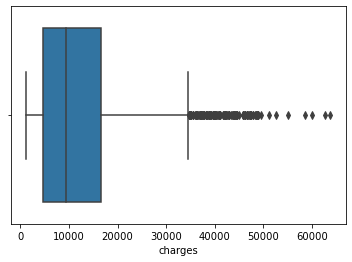

In [10]:
# Understanding about some columns first.
#sns.set_theme(style="whitegrid")
sns.boxplot(medi['charges'])

<AxesSubplot:xlabel='bmi'>

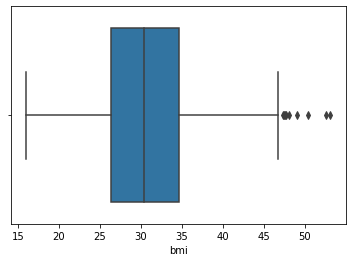

In [11]:
sns.boxplot(medi['bmi'])

In [12]:
medi[['sex','age']].groupby('sex').agg(['mean','count'])

age      
             mean count
sex                    
female  39.503021   662
male    38.917160   676

In [13]:
medi['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
medi[['sex','children']].groupby('sex').agg(['mean'])

,children
,mean
sex,
female,1.074018
male,1.115385


<AxesSubplot:xlabel='age', ylabel='bmi'>

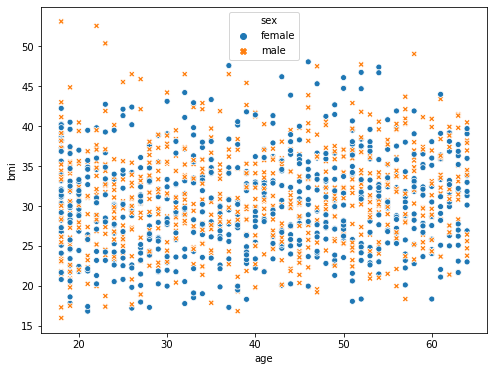

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=medi, x="age", y="bmi", hue="sex", style="sex")

<AxesSubplot:xlabel='age', ylabel='charges'>

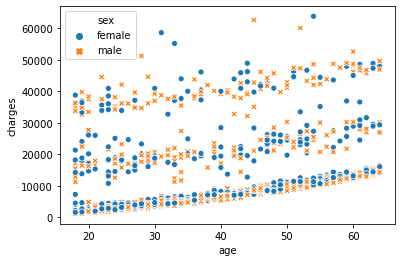

In [16]:
sns.scatterplot(data=medi, x="age", y="charges", hue="sex", style="sex")

<AxesSubplot:xlabel='age', ylabel='charges'>

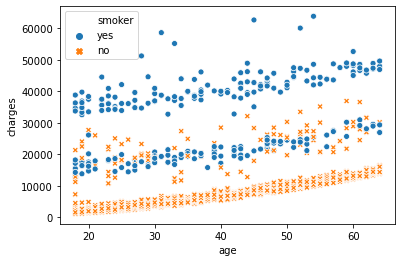

In [17]:
sns.scatterplot(data=medi, x="age", y="charges", hue="smoker", style="smoker")

In [18]:
# First removing outlier values:

medi = medi[medi['bmi'] < 47]
# medi = medi[medi['charges'] < 25000]

medi.shape

(1329, 7)

In [19]:
# Finding categorical data:

medi['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

In [20]:
medi['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

In [21]:
medi['sex'].value_counts()

male      670
female    659
Name: sex, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [23]:
name_list = ['sex', 'smoker', 'region']

for name in name_list:
  medi[name] = label_encoded(medi[name])

medi.head(3) 

sex ['female' 'male']
smoker ['no' 'yes']
region ['northeast' 'northwest' 'southeast' 'southwest']


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620


<AxesSubplot:>

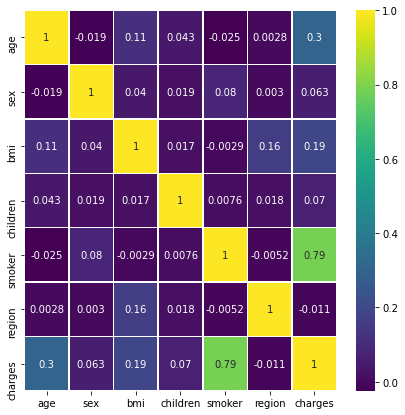

In [25]:
plt.figure(figsize=(7,7))
sns.heatmap(medi.corr(),annot=True,cmap='viridis',linewidths=.5)

In [26]:
y = medi['charges']
X = medi.drop(['charges'], axis = 1)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [28]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [29]:
random_model = RandomForestRegressor(n_estimators=250, n_jobs = -1)

In [30]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

97.61 %


In [31]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

83.11 %


In [33]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('C:/Users/HP/Documents/GitHub/medical_cost/Medical.pickle','wb'))